<a href="https://colab.research.google.com/github/EdFlo15/FastAPI_Wines/blob/main/Colab_wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging. 

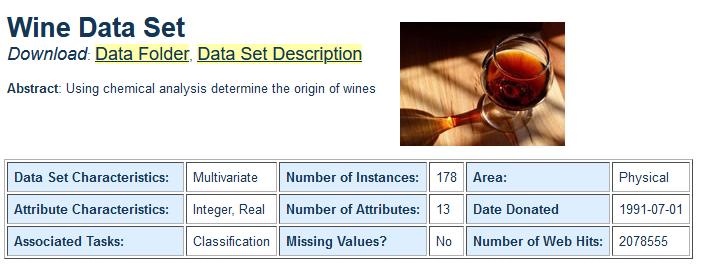

In [1]:
# libreria requerida para realizar curva roc
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Version de python utilizada en el entorno
!python -V

Python 3.8.10


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# librerias para las metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC

In [4]:
# Carga de datos
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None, delimiter=',')
df

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

Guardamos el nombre de las columnas(features) en una lista para posteriormente colocarlas en el dataframe. 

class_names se utiliza posteriormente para realizar las tablas de clasifiación.

In [5]:
all_names=['variety','Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280','Proline']

names_features=['Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280','Proline']

class_names=['variety1','variety2','variety3']

In [6]:
df.columns=all_names
df

variety  Alcohol  Malic-acid   Ash  Alcalinity-of-ash  Magnesium  \
0          1    14.23        1.71  2.43               15.6        127   
1          1    13.20        1.78  2.14               11.2        100   
2          1    13.16        2.36  2.67               18.6        101   
3          1    14.37        1.95  2.50               16.8        113   
4          1    13.24        2.59  2.87               21.0        118   
..       ...      ...         ...   ...                ...        ...   
173        3    13.71        5.65  2.45               20.5         95   
174        3    13.40        3.91  2.48               23.0        102   
175        3    13.27        4.28  2.26               20.0        120   
176        3    13.17        2.59  2.37               20.0        120   
177        3    14.13        4.10  2.74               24.5         96   

     Total-phenols  Flavanoids  Nonflavanoid-phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color_intensity   Hue  OD280  Proline  
0               5.64  1.04   3.92     1065  
1               4.38  1.05   3.40     1050  
2               5.68  1.03   3.17     1185  
3               7.80  0.86   3.45     1480  
4               4.32  1.04   2.93      735  
..               ...   ...    ...      ...  
173             7.70  0.64   1.74      740  
174             7.30  0.70   1.56      750  
175            10.20  0.59   1.56      835  
176             9.30  0.60   1.62      840  
177             9.20  0.61   1.60      560  

[178 rows x 14 columns]

Podemos ver el número de registros, el tipo de variable y si se encuentran o no nulos en cada una de las variables. Del analisis se observa que no hay nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   variety               178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic-acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity-of-ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total-phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid-phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Ahora realiemos una anlisis descriptivo de las variables para identificar su distribucion en percentiles para identificar posibles atipicos.


In [8]:
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.99]).T

count        mean         std     min        5%  \
variety               178.0    1.938202    0.775035    1.00    1.0000   
Alcohol               178.0   13.000618    0.811827   11.03   11.6585   
Malic-acid            178.0    2.336348    1.117146    0.74    1.0610   
Ash                   178.0    2.366517    0.274344    1.36    1.9200   
Alcalinity-of-ash     178.0   19.494944    3.339564   10.60   14.7700   
Magnesium             178.0   99.741573   14.282484   70.00   80.8500   
Total-phenols         178.0    2.295112    0.625851    0.98    1.3800   
Flavanoids            178.0    2.029270    0.998859    0.34    0.5455   
Nonflavanoid-phenols  178.0    0.361854    0.124453    0.13    0.1900   
Proanthocyanins       178.0    1.590899    0.572359    0.41    0.7300   
Color_intensity       178.0    5.058090    2.318286    1.28    2.1140   
Hue                   178.0    0.957449    0.228572    0.48    0.5700   
OD280                 178.0    2.611685    0.709990    1.27    1.4625   
Proline               178.0  746.893258  314.907474  278.00  354.5500   

                           25%      50%       75%        99%      max  
variety                 1.0000    2.000    3.0000     3.0000     3.00  
Alcohol                12.3625   13.050   13.6775    14.4728    14.83  
Malic-acid              1.6025    1.865    3.0825     5.5422     5.80  
Ash                     2.2100    2.360    2.5575     2.9890     3.23  
Alcalinity-of-ash      17.2000   19.500   21.5000    28.5000    30.00  
Magnesium              88.0000   98.000  107.0000   141.7600   162.00  
Total-phenols           1.7425    2.355    2.8000     3.5959     3.88  
Flavanoids              1.2050    2.135    2.8750     3.7914     5.08  
Nonflavanoid-phenols    0.2700    0.340    0.4375     0.6300     0.66  
Proanthocyanins         1.2500    1.555    1.9500     3.0336     3.58  
Color_intensity         3.2200    4.690    6.2000    11.0185    13.00  
Hue                     0.7825    0.965    1.1200     1.4269     1.71  
OD280                   1.9375    2.780    3.1700     3.8430     4.00  
Proline               500.5000  673.500  985.0000  1522.3600  1680.00

En los datos preliminarmente se observa una consistencia en los datos sin atipicos que requieran eliminarse.

Con el fin de analizar como es la dispersion a nivel grafico seleccionamos algunas variables. Dejando la variable Magnesium y Proline para analizar individualmente debido a que tienen valores númericos altos en comparación con las demás features.

In [9]:
names_selected=['Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Total-phenols','Flavanoids','Nonflavanoid-phenols','Proanthocyanins',
'Color_intensity','Hue','OD280']

Se crea un nuevo dataframe con las variables seleccionadas

In [10]:
df2=df[names_selected]

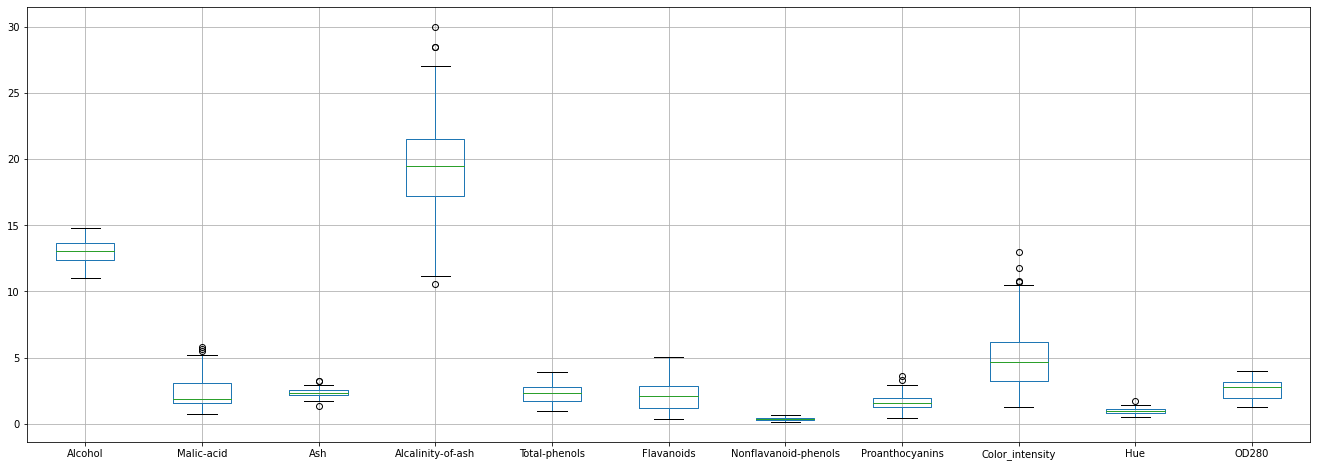

In [11]:
df2.boxplot(figsize=(23,8))
plt.show()

Como se observa el grafico de boxplot, algunas variables como malic-acid, Ash, alcalinity-of-ash, proanthocyanins, color_intensity y hue presentan atipicos, sin embargo no son atipicos que requieran ser eliminados por lo que se dejan en el dataframe

Ahora analicemos de manera independiente la variable Proline la cual tiene valores que van desde 278 a 1680. Como se observa no se encuentran valores atipicos

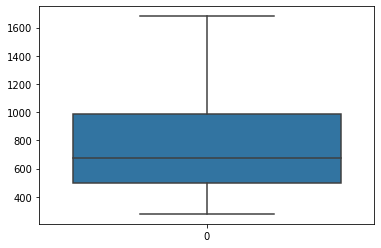

In [12]:
sns.boxplot(data=df['Proline'])
plt.show()


Ahora analicemos de manera independiente la variable Magnesium la cual tiene valores que van desde 70 a 162 Como se observa 4 valores son atipicos pero son aceptables para trabajar con ellos  con el fin de evitar perder informacion valiosa.

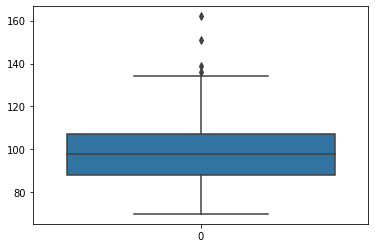

In [13]:
sns.boxplot(data=df['Magnesium'])
plt.show()

Ahora analicemos las correlaciones entre las diferentes variables: Este analisis tiene sentido para las variables independientes ya que la variable objetivo es categorica (variable numerica ordinal)

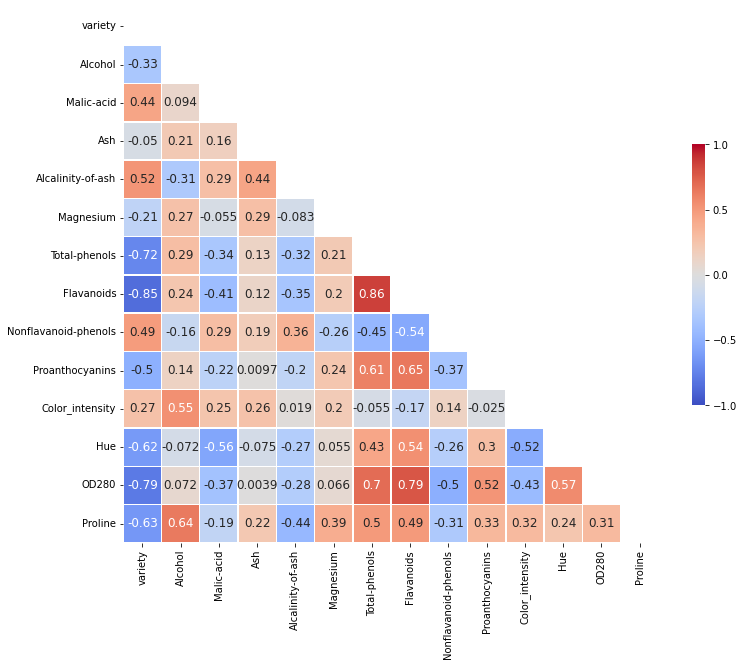

In [14]:
corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()


Se observa una alta correlacion positiva entre las variables Flavanoids y Total-phenols y entre 0D280 y Flavanoids

Finalmente analicemos la variable  dependiente (Origen del cultivo de uva): Se observa que las clases no presentan un desbalanceo significativo por lo que se pude dejar sin realizar balanceos

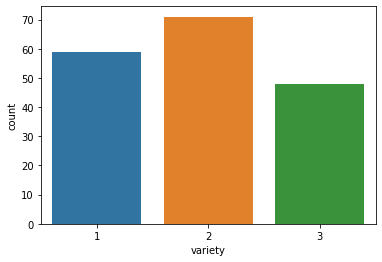

In [15]:
sns.countplot(data=df, x='variety')
plt.show()

### Analisis Univariado y bivariado con respecto a la variable objetivo

In [16]:
# Creación del dataframe df3
df3=df
df3['variety'] = df3['variety'].apply(lambda x: str(x)) 

Debido a que hay varias varaibles, particionamos el dataframe en dos partes para poder realizar el analisis gráfico un poco mejor. Utilizando df4 para unas variables y df5 para el resto de variables

In [17]:
df4=df3[['variety','Alcohol','Malic-acid','Ash','Alcalinity-of-ash','Magnesium','Total-phenols','Flavanoids']]

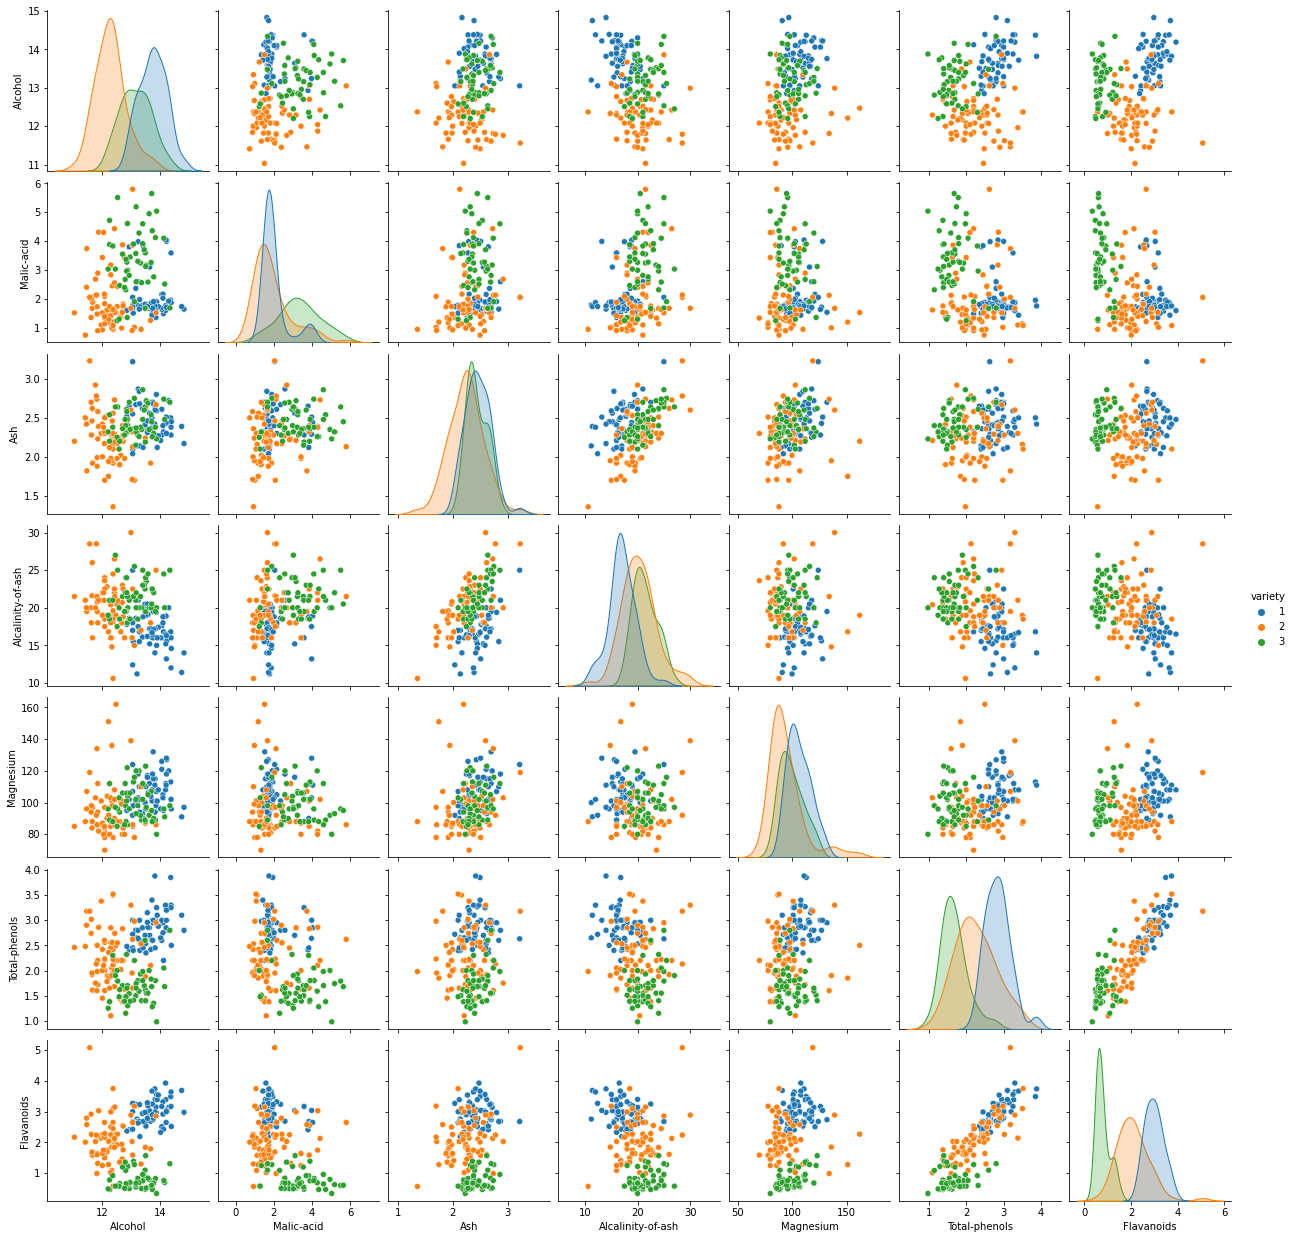

In [18]:
sns.pairplot(df4,hue="variety")
plt.show()

En la gráfica anterior podemos observar como se distribuye cada una de las variables con la variable objetivo. Se puede observar que la variable Alcohol pesenta una buena seperación de los tipos de vinos igualmente la variable Flavanoids. Estas son variables que podrían explicar bien los diferentes origenes del cultivo para los vinos.

Al realizar el analisis bivariado entre la variable Alcohol y Flavanoids versus la variaible objetivo, se observa una separación clara entre las clases, por lo tanto estas dos variables podrían ser importantes en el modelo

Ahora analizamos las otras variables restantes

In [19]:
df5=df3[['variety','Nonflavanoid-phenols','Proanthocyanins','Color_intensity','Hue','OD280','Total-phenols','Proline']]

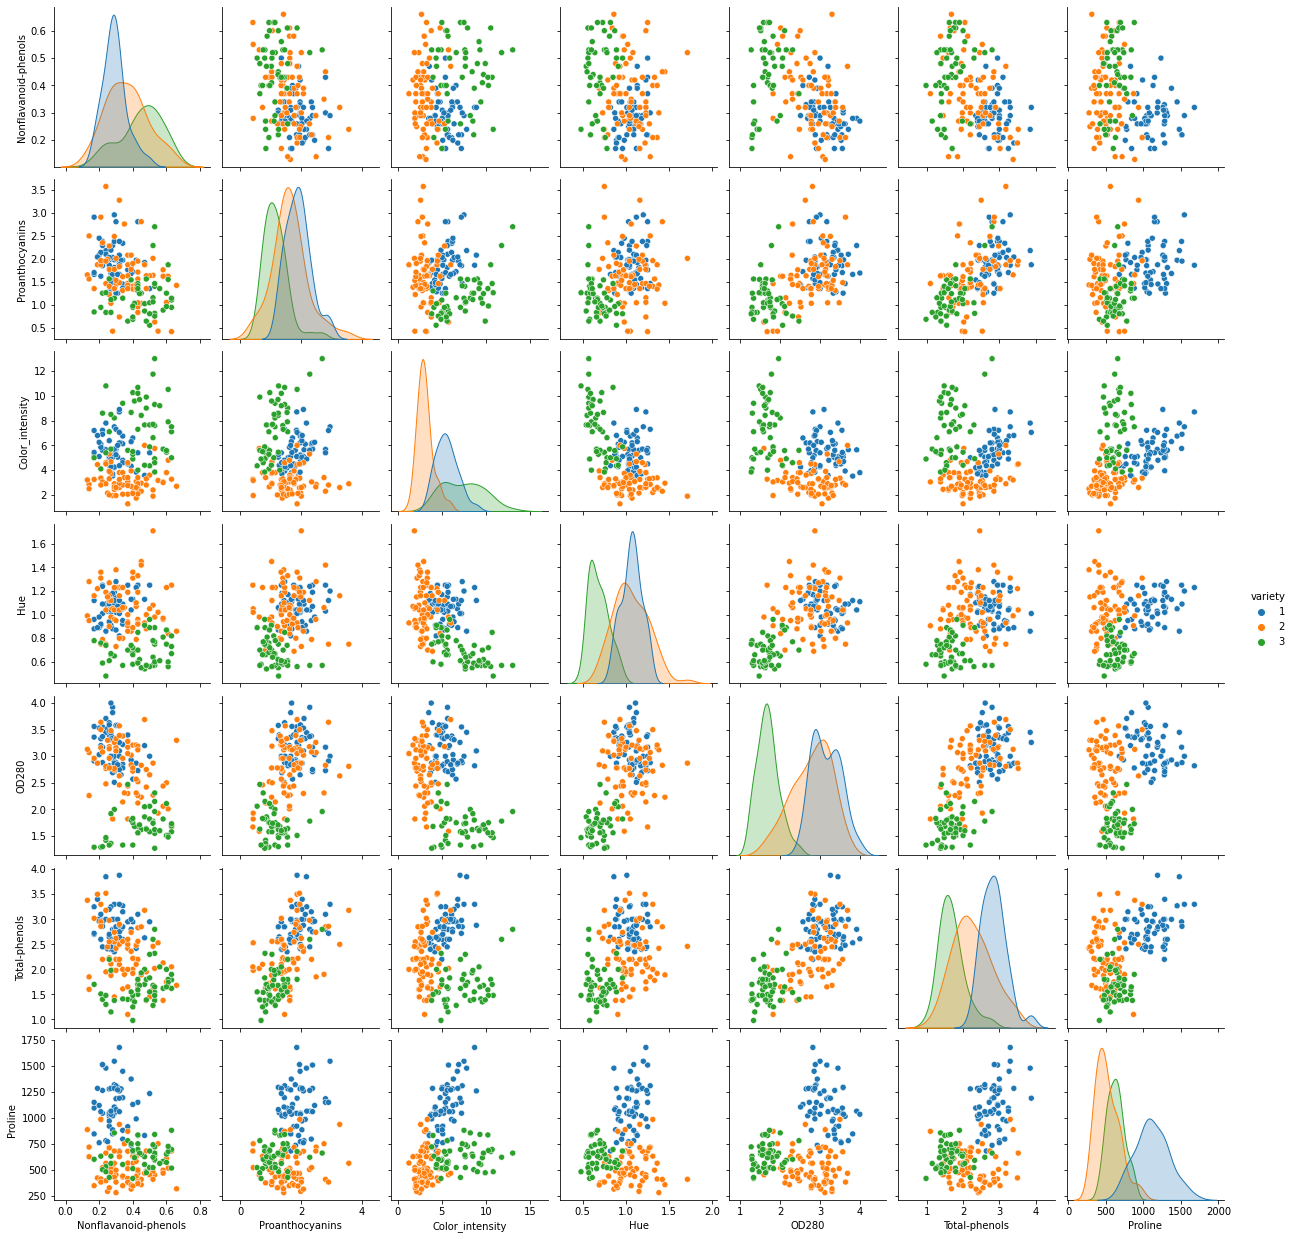

In [20]:
sns.pairplot(df5,hue="variety")
plt.show()

La variable color-intensity y proline tambien podrían ser dos variables importantes para el modelo de acuerdo con analisis gráfico ya que la distribución para las tres categorias de la variable de respuesta presentan una seprabilidad marcada. igualmente al realizar el analisis bivariado con esta dos variables se podria obtener un buen modelo.

### Modelado

Partamos de la base  original

In [21]:
df

variety  Alcohol  Malic-acid   Ash  Alcalinity-of-ash  Magnesium  \
0         1    14.23        1.71  2.43               15.6        127   
1         1    13.20        1.78  2.14               11.2        100   
2         1    13.16        2.36  2.67               18.6        101   
3         1    14.37        1.95  2.50               16.8        113   
4         1    13.24        2.59  2.87               21.0        118   
..      ...      ...         ...   ...                ...        ...   
173       3    13.71        5.65  2.45               20.5         95   
174       3    13.40        3.91  2.48               23.0        102   
175       3    13.27        4.28  2.26               20.0        120   
176       3    13.17        2.59  2.37               20.0        120   
177       3    14.13        4.10  2.74               24.5         96   

     Total-phenols  Flavanoids  Nonflavanoid-phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color_intensity   Hue  OD280  Proline  
0               5.64  1.04   3.92     1065  
1               4.38  1.05   3.40     1050  
2               5.68  1.03   3.17     1185  
3               7.80  0.86   3.45     1480  
4               4.32  1.04   2.93      735  
..               ...   ...    ...      ...  
173             7.70  0.64   1.74      740  
174             7.30  0.70   1.56      750  
175            10.20  0.59   1.56      835  
176             9.30  0.60   1.62      840  
177             9.20  0.61   1.60      560  

[178 rows x 14 columns]

Para realizar el modelo, separamos las features del target.

In [22]:
features=df.iloc[:,1:]
features

Alcohol  Malic-acid   Ash  Alcalinity-of-ash  Magnesium  Total-phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid-phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [23]:
target=df['variety']

Importante realizar la partición de los datos para dejar un 80% para el entrenamiento (142 registros) y 20% para validación (36 registros). Random_state para garantizar la repeticion de los resultados.  Suffle=True para aletoriedad de los datos.

In [24]:
# Create train and test data
feature_train, feature_test, target_train, target_test=train_test_split(
                                        features,
                                        target,
                                        random_state=0,
                                        test_size=0.20,
                                        shuffle=True
                            )

Verificamos el tamaño de los dataframe

In [25]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)


(142, 13)
(36, 13)
(142,)
(36,)


Verificación de los tipos de datos

In [26]:
print(type(feature_train))
print(type(feature_test))
print(type(target_train))
print(type(target_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Logistic Regresion

Cuando contamos con una variable de respuesta con mas de dos categorias podemos hacer One Versus Rest (ovr)
tambien es posible hacer uso del de multi_class="multinimomial" especificando el max_iter que es el maximo numero
de iteraciones para alcanzar la convergencia.

In [27]:
# train model. Nota: cuando se cuenta con una gran cantidad de datos, es una buena idea probar el solver: SAG, sin embargo para este caso el conjunto de datos es pequeño se maneja lbfgs
clasifier=LogisticRegression(random_state=0, multi_class="multinomial", max_iter=20000, solver='lbfgs', penalty='l2')

In [28]:
model=clasifier.fit(feature_train, target_train)

In [29]:
# Guradamos las predicciones tanto en probabilidades como en categoria de pertenencia
target_predict_proba=model.predict_proba(feature_test)
target_predict=model.predict(feature_test)

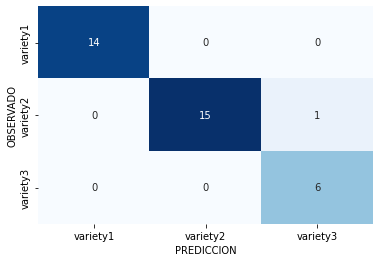

In [30]:
matrix=confusion_matrix(target_test, target_predict)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")

plt.show()

Como se observa en la tabla de clasificación se obtienen muy buenos resultados sobre los datos de test (validacion) Debido a que solo se obtiene un error en la clasificación. Que corresponde  a la variedad 2. 

Interpretemos los resultados para la variedad 2: 

De 16 muestras de vinos de origen variedad 2, el modelo logró clasificar correctamente 15. Esta metrica de conoce como  recall y se calcula como (VP/VP+FP)=0.9375.

Las predicciones totales para la variedad 2 fueron toda correctas, el modelo no se equivocó para este tipo de vino. Esta metrica es la precision  y es del 100%. 

El accuracy del modelo (Porcentaje general de aciertos) es del 0.97

In [31]:
# imprimanos las metrica en general del modelo para todas las variedades
print(classification_report(target_test, target_predict, target_names=class_names))


              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      0.94      0.97        16
    variety3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



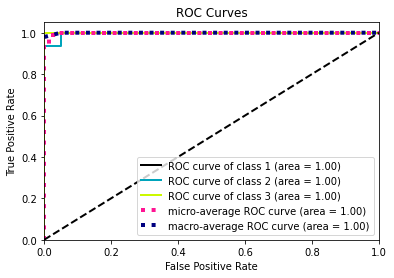

In [32]:
# visualizacion de la curva ROC
skplt.metrics.plot_roc(target_test, target_predict_proba)
plt.show()

### SVC

El metodo SVC es lento cuento se tienen grandes cantidades de datos, sin embargo para este problema especifico en donde se cuentan con pocas muestras se puede utilizar sin ningun problema. Otra consideración importantes es que los datos se deben escalar o estandarizar tanto en entrenamiento como en validación

In [33]:
# En un pipeline se puede estandarizar los datos
steps = [('STD', StandardScaler()), ('SVM_rbf', SVC(kernel='rbf',probability=True))]
pipeline = Pipeline(steps) 

In [34]:
# se Realiza una busqueda de hiperparametros.
parameters = {'SVM_rbf__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM_rbf__gamma':[0.01,0.1,1,2,20],'SVM_rbf__kernel': ['rbf']}
#parameters = {'SVM__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM__kernel': ['linear']}
#parameters = {'SVM__C':[0.001,0.1,1,10,20,50,100,1000,100000], 'SVM__kernel': ['poly'],'SVM__gamma':[0.01,0.1,1,2,20],'SVM__degree':[2,3,4]}

In [35]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=3,scoring='accuracy')
grid.fit(feature_train, target_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('STD', StandardScaler()),
                                       ('SVM_rbf', SVC(probability=True))]),
             param_grid={'SVM_rbf__C': [0.001, 0.1, 1, 10, 20, 50, 100, 1000,
                                        100000],
                         'SVM_rbf__gamma': [0.01, 0.1, 1, 2, 20],
                         'SVM_rbf__kernel': ['rbf']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'SVM_rbf__C': 1, 'SVM_rbf__gamma': 0.1, 'SVM_rbf__kernel': 'rbf'}

Despues de encontrar los mejores hiperparametros, podemos instanaciar un objeto de SVC y configurar los parametros encontrados

In [37]:
modelo_SVC=SVC(C=1, kernel='rbf', gamma=0.1, shrinking=True, probability=True, class_weight=None)

Importante antes de realizar el fit del modelo, se deben estandarizar los datos de entrenamiento, los datos de validación se estandarizan aparte

In [39]:
scalerSVC_train=StandardScaler()
data_train_scaled=scalerSVC_train.fit_transform(feature_train)
pd_data_train_scaled=pd.DataFrame(data_train_scaled, columns=names_features)
pd_data_train_scaled

Alcohol  Malic-acid       Ash  Alcalinity-of-ash  Magnesium  \
0    0.876683    0.798429  0.644130           0.129743   0.488532   
1   -0.366591   -0.758130 -0.397799           0.333800  -1.413024   
2   -1.696894   -0.344248 -0.323375          -0.453279  -0.145320   
3    0.516134    1.383263  0.420859           1.004275   0.136392   
4    0.640461   -0.506202  0.904612           0.129743  -0.286176   
..        ...         ...       ...                ...        ...   
137 -1.448239   -0.587179 -1.811844          -0.016013  -0.990456   
138 -0.764438   -1.082039 -1.662997           0.013139  -1.553880   
139 -0.702275   -0.686151 -0.658281           0.858519   0.558960   
140  1.137771   -0.623169 -0.918763          -1.036300   0.065964   
141  1.461022    0.123620  0.420859           0.129743  -0.638316   

     Total-phenols  Flavanoids  Nonflavanoid-phenols  Proanthocyanins  \
0        -0.703262   -1.428468              1.072457        -1.368203   
1        -1.441531   -0.502998              1.701100         0.023668   
2         1.249050    0.319642             -1.520697        -0.434631   
3        -0.752480   -1.233091              0.522394        -0.332787   
4         0.445157    0.679547             -0.656312         0.091564   
..             ...         ...                   ...              ...   
137       0.395939   -0.317904              0.050911        -0.315813   
138      -0.243895    0.052284             -0.734893        -0.960826   
139      -0.424360    0.144831             -0.184830         0.006694   
140       1.380298    1.481621             -1.206375         0.906318   
141      -0.949352   -1.284506              0.600974        -0.621345   

     Color_intensity       Hue     OD280   Proline  
0           0.351932  0.029017 -1.064122 -0.205908  
1          -0.841146  0.029017 -0.730832 -0.817047  
2          -0.756829  0.901974  0.519005 -1.312565  
3           0.950579 -1.105828 -1.425187  0.025334  
4          -0.643002  0.727382  1.713295  0.339162  
..               ...       ...       ...       ...  
137        -1.258512 -0.058279 -0.203123 -1.081323  
138        -0.153967  0.727382  1.241134 -0.767495  
139        -1.258512  0.465495  0.519005 -1.312565  
140         0.444680 -0.189223  1.032828  0.801646  
141         1.962377 -1.455010 -1.216880 -0.271977  

[142 rows x 13 columns]

Una vez los datos se han escalado se realiza el fit del modelo

In [40]:
modelo_SVC.fit(pd_data_train_scaled,target_train)

SVC(C=1, gamma=0.1, probability=True)

Para realizar las predicciones con los datos de validación, estos primero se deben estandarizar

In [41]:
scalerSVC_test=StandardScaler()
data_test_scaled=scalerSVC_test.fit_transform(feature_test)
pd_data_test_scaled=pd.DataFrame(data_test_scaled, columns=names_features)
pd_data_test_scaled

Alcohol  Malic-acid       Ash  Alcalinity-of-ash  Magnesium  \
0   0.819019   -0.470348 -0.394003          -0.989352   1.361577   
1  -0.329892    0.428406  0.394003           0.948970   0.943227   
2  -0.837831   -0.955675 -0.702353          -0.089417  -0.799903   
3   0.601330   -0.416423  0.325481           0.429777   1.222127   
4  -0.015453    3.241505 -0.805136           0.775906  -0.869628   
5  -1.817429   -0.128821  2.963586           3.198809   1.431303   
6   1.206020   -0.038946  0.839397          -0.573997   1.570753   
7  -0.849925    1.470960  0.051392           0.602841  -0.730177   
8  -0.982957   -0.416423 -0.839397          -0.089417  -1.287979   
9  -1.188551   -0.326547 -0.154175          -0.262481  -1.218254   
10  0.359454    0.329543 -0.051392           0.256712  -0.660452   
11  0.988332    2.558452 -0.462525           0.256712  -1.287979   
12  1.375333   -0.389460  0.291219          -1.404707   0.943227   
13 -0.837831   -1.009600 -0.907919          -0.262481  -0.730177   
14  0.625518    0.347518  1.113486           1.814293   0.455150   
15 -1.285302   -1.144413 -1.250531          -0.089417  -0.869628   
16  0.843206   -0.596173  1.147747           0.083648   2.337730   
17  1.363239   -0.542248  0.394003          -0.954739   0.664326   
18 -0.511299   -0.748961 -1.182008          -0.850901   0.106525   
19  0.927863   -0.488323  0.805136          -0.712449  -0.311826   
20  0.057110   -1.063525 -2.278364          -1.473933  -1.427429   
21 -0.015453   -0.488323  0.633831          -0.435546  -0.032926   
22  0.214329    0.356506  1.730186           0.602841   1.361577   
23 -0.668518   -0.416423 -1.319053           0.429777  -0.939353   
24 -0.886206   -0.982637 -0.291219          -1.127804   0.176250   
25 -0.656424    0.212705 -0.668092           0.602841  -0.730177   
26 -0.765268   -0.596173 -0.256958           0.775906  -0.869628   
27 -1.091801   -0.524273 -0.188436           1.225874  -0.590727   
28 -1.575553    0.437393  1.901492           0.256712   0.315700   
29  0.867394    0.509294 -0.222697           0.948970  -0.590727   
30  0.395736   -0.380472  0.873658          -1.093191  -0.381552   
31  1.399521   -0.443385 -0.222697          -1.023965   1.361577   
32 -1.236926    1.893374  0.051392           0.948970  -1.287979   
33  1.387427    1.659698  0.256958          -0.124030   0.873501   
34  2.137242   -0.497310 -0.668092          -1.820062  -0.102651   
35 -0.015453   -0.380472 -0.907919          -0.781675   0.594601   

    Total-phenols  Flavanoids  Nonflavanoid-phenols  Proanthocyanins  \
0        0.244442    0.541366             -1.314240         0.182529   
1       -1.454851   -0.961554             -1.042849        -0.556714   
2        1.609945    0.736550             -1.495168         0.695892   
3        0.790643    0.424255             -1.404704         1.886894   
4        0.274786    0.297385             -0.500065         0.983375   
5        1.124433    2.668876              1.037823         0.695892   
6        0.244442    0.160756             -0.409601        -0.577248   
7       -0.210726   -1.390960              1.309215        -1.008473   
8       -1.196922   -0.307687              0.133183         0.203064   
9       -1.272784   -0.824925              1.490143         0.223598   
10      -1.576229   -1.800847              0.133183        -1.829854   
11      -2.213464   -1.956995              0.404575        -1.747716   
12       1.260983    1.019567             -0.138209         0.901237   
13       1.640289    1.370899             -1.042849         0.860168   
14      -1.348645   -1.469034              0.314111         0.018253   
15      -0.028659   -0.083224             -0.500065        -0.207627   
16       0.775471    0.385218              1.309215        -0.371903   
17       1.306500    1.546565             -0.319137         0.675357   
18      -0.635549   -0.912758              1.580607        -1.870923   
19       0.016858    0.629199             -1.223

La predicción se realiza sobre los datos que se han estandarizado

In [42]:
predict_svc=modelo_SVC.predict(pd_data_test_scaled)
predictt_proba_svc=modelo_SVC.predict_proba(pd_data_test_scaled)

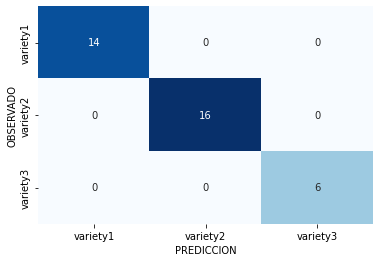

In [43]:
matrix=confusion_matrix(target_test, predict_svc)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")
plt.show()

En el caso de el clasificador Support Vector Machine el recall y la precision  fueron del 100%. No se tienen errores. Este tipo de problemas son pocos comunes en muchos de los problemas de analitica, sin embargo en este caso los datos con los que se cuentan explican muy bien la variable objetivo

In [44]:
print(classification_report(target_test, predict_svc, target_names=class_names))

              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      1.00      1.00        16
    variety3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



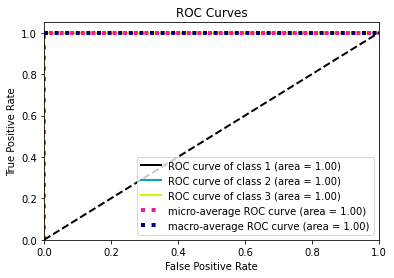

In [45]:
skplt.metrics.plot_roc(target_test, predictt_proba_svc)
plt.show()

### Busqueda de hiperparametros Random Forest

Tambien podemos intentar una busqueda aleatoria de hiperparametros y con random forest. 

In [46]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
#max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]
# seleccion de gini o entropia
criterion=['gini', 'entropy']


# Create the random grid
hyperparameters_tuning = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

print(hyperparameters_tuning)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [48]:
# Creación de intancia de RandomForestClassifier
modeloRF = RandomForestClassifier()

# Busqueda de hiperparametros 
random_search_RF= RandomizedSearchCV(estimator=modeloRF,
                                   param_distributions=hyperparameters_tuning,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5, 
                                   verbose=1)

random_search_RF.fit(feature_train, target_train)
print("Mejores hiperparametros:",random_search_RF.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparametros: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'criterion': 'entropy', 'bootstrap': True}


In [49]:
predict_RF=random_search_RF.predict(feature_test)
predict_proba_RF=random_search_RF.predict_proba(feature_test)

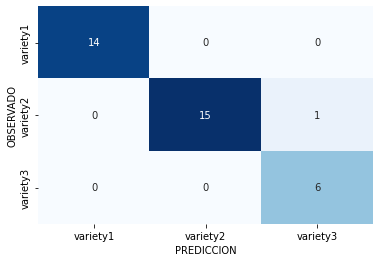

In [50]:
matrix=confusion_matrix(target_test, predict_RF)
matrix

# create dataframe
dataframe=pd.DataFrame(matrix, index=class_names, columns=class_names)
# create headmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.xlabel("PREDICCION")
plt.ylabel("OBSERVADO")
plt.show()

El resultado de clasificación con Random Forest es similar que con regresión logistica. El accuracy es del 0.97

In [51]:
print(classification_report(target_test, predict_RF, target_names=class_names))

              precision    recall  f1-score   support

    variety1       1.00      1.00      1.00        14
    variety2       1.00      0.94      0.97        16
    variety3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



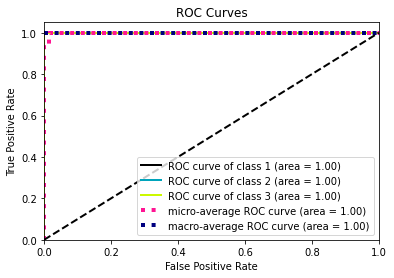

In [52]:
skplt.metrics.plot_roc(target_test, predict_proba_RF)
plt.show()

## Prediccion de nuevas muestras

In [53]:
muestra1=[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]
muestra2=[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
muestra3=[8.37,2,1.36,12.6,200,3,0.57,0.28,0.42,1.95,1.05,1.82,600]
muestra4=[5,0.94,2,11.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.90,200]
muestra5=[10.37,0.1,2,2.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,800]
muestra6=[30.37,0.5,8,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,1300]
muestra7=[13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835]

dic={'muestra1':muestra1,'muestra2':muestra2, 'muestra3':muestra3,'muestra4':muestra4,'muestra5':muestra5,'muestra6':muestra6, 'muestra7':muestra7}

In [54]:
df_muestra=pd.DataFrame(dic,index=None)
df_muestra=df_muestra.transpose()
df_muestra.columns=names_features
df_muestra.reset_index(drop=True, inplace=True)
df_muestra

Alcohol  Malic-acid   Ash  Alcalinity-of-ash  Magnesium  Total-phenols  \
0    13.72        1.43  2.50               16.7      108.0           3.40   
1    12.37        0.94  1.36               10.6       88.0           1.98   
2     8.37        2.00  1.36               12.6      200.0           3.00   
3     5.00        0.94  2.00               11.6       88.0           1.98   
4    10.37        0.10  2.00                2.6       88.0           1.98   
5    30.37        0.50  8.00               10.6       88.0           1.98   
6    13.27        4.28  2.26               20.0      120.0           1.59   

   Flavanoids  Nonflavanoid-phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.67                  0.19             2.04             6.80  0.89   
1        0.57                  0.28             0.42             1.95  1.05   
2        0.57                  0.28             0.42             1.95  1.05   
3        0.57                  0.28             0.42             1.95  1.05   
4        0.57                  0.28             0.42             1.95  1.05   
5        0.57                  0.28             0.42             1.95  1.05   
6        0.69                  0.43             1.35            10.20  0.59   

   OD280  Proline  
0   2.87   1285.0  
1   1.82    520.0  
2   1.82    600.0  
3   1.90    200.0  
4   1.82    800.0  
5   1.82   1300.0  
6   1.56    835.0

Como se observa la nueva muestra se ajusta en un dataframe para luego pasarla al mejor modelo.

## Predicción con regresión Logistica

In [56]:
# resultado en clases
print(model.predict(df_muestra))

['1' '2' '2' '2' '2' '1' '3']


In [57]:
# resultado en probabilidades
print(model.predict_proba(df_muestra))

[[9.99977232e-01 7.56757573e-07 2.20112735e-05]
 [1.54282336e-04 9.98010332e-01 1.83538606e-03]
 [3.14545968e-06 7.59395465e-01 2.40601390e-01]
 [2.38095551e-10 9.99995042e-01 4.95794776e-06]
 [2.65499033e-02 9.70856477e-01 2.59361975e-03]
 [9.99999997e-01 3.03649738e-15 3.46012707e-09]
 [5.37562972e-04 2.39763270e-08 9.99462413e-01]]


## Predicción con randomForest

In [58]:
print(random_search_RF.predict(df_muestra))

['1' '2' '2' '2' '2' '2' '3']


In [59]:
print(random_search_RF.predict_proba(df_muestra))

[[0.98193809 0.01668691 0.001375  ]
 [0.00630517 0.8101546  0.18354024]
 [0.0222635  0.78879909 0.18893741]
 [0.00797183 0.81199491 0.18003326]
 [0.04129309 0.75382271 0.2048842 ]
 [0.12273851 0.6267352  0.25052628]
 [0.01938336 0.02406151 0.95655513]]


## Predicción con SVC


SVC requiere que los datos sean estandarizados antes de realizar las predicciones , debido a que en la fase entrenamiento se realizó este mismo proceso

In [61]:
df_muestra

Alcohol  Malic-acid   Ash  Alcalinity-of-ash  Magnesium  Total-phenols  \
0    13.72        1.43  2.50               16.7      108.0           3.40   
1    12.37        0.94  1.36               10.6       88.0           1.98   
2     8.37        2.00  1.36               12.6      200.0           3.00   
3     5.00        0.94  2.00               11.6       88.0           1.98   
4    10.37        0.10  2.00                2.6       88.0           1.98   
5    30.37        0.50  8.00               10.6       88.0           1.98   
6    13.27        4.28  2.26               20.0      120.0           1.59   

   Flavanoids  Nonflavanoid-phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.67                  0.19             2.04             6.80  0.89   
1        0.57                  0.28             0.42             1.95  1.05   
2        0.57                  0.28             0.42             1.95  1.05   
3        0.57                  0.28             0.42             1.95  1.05   
4        0.57                  0.28             0.42             1.95  1.05   
5        0.57                  0.28             0.42             1.95  1.05   
6        0.69                  0.43             1.35            10.20  0.59   

   OD280  Proline  
0   2.87   1285.0  
1   1.82    520.0  
2   1.82    600.0  
3   1.90    200.0  
4   1.82    800.0  
5   1.82   1300.0  
6   1.56    835.0

In [62]:
scaled_sample=StandardScaler()
data_sample_scaled=scaled_sample.fit_transform(df_muestra)
pd_data_sample_scaled=pd.DataFrame(data_sample_scaled, columns=names_features)
pd_data_sample_scaled

Alcohol  Malic-acid       Ash  Alcalinity-of-ash  Magnesium  \
0  0.048925   -0.020013 -0.130578           0.910120  -0.090147   
1 -0.130975   -0.401365 -0.656847          -0.296778  -0.616002   
2 -0.664012    0.423602 -0.656847           0.098926   2.328787   
3 -1.113096   -0.401365 -0.361398          -0.098926  -0.616002   
4 -0.397494   -1.055113 -0.361398          -1.879596  -0.616002   
5  2.267693   -0.743805  2.408439          -0.296778  -0.616002   
6 -0.011041    2.198059 -0.241371           1.563033   0.225367   

   Total-phenols  Flavanoids  Nonflavanoid-phenols  Proanthocyanins  \
0       1.846414    2.447684             -1.503557         2.076292   
1      -0.479740   -0.426490             -0.130744        -0.602337   
2       1.191159   -0.426490             -0.130744        -0.602337   
3      -0.479740   -0.426490             -0.130744        -0.602337   
4      -0.479740   -0.426490             -0.130744        -0.602337   
5      -0.479740   -0.426490             -0.130744        -0.602337   
6      -1.118613   -0.315232              2.157277         0.935394   

   Color_intensity       Hue     OD280   Proline  
0         0.962266 -0.442634  2.369544  1.329796  
1        -0.604589  0.548866 -0.318133 -0.731291  
2        -0.604589  0.548866 -0.318133 -0.515753  
3        -0.604589  0.548866 -0.113358 -1.593445  
4        -0.604589  0.548866 -0.318133  0.023093  
5        -0.604589  0.548866 -0.318133  1.370209  
6         2.060680 -2.301696 -0.983653  0.117392

In [64]:
print(modelo_SVC.predict(pd_data_sample_scaled))

['1' '2' '2' '2' '2' '1' '3']


In [65]:
print(modelo_SVC.predict_proba(pd_data_sample_scaled))

[[0.54179813 0.40212009 0.05608178]
 [0.00706178 0.9843305  0.00860772]
 [0.03990545 0.93078792 0.02930663]
 [0.00183821 0.99274273 0.00541906]
 [0.08189595 0.89607475 0.0220293 ]
 [0.53614028 0.34411721 0.11974251]
 [0.0499829  0.30861576 0.64140134]]


## Despliegue del modelo

¿Como se dispone el modelo para que realizar nuevas predicciones?

- Esto se puede realizar a través de la serialización del modelo entrenado que tiene los parametros encontrados en el entrenamiento. Es archivo se guarda para no tener que entrenar el modelo cad vez que se vaya a realizar una predicción.
- Pickle es la libreria que nos puede ayudar a serializar el modelo entrenado.

pickle — Python object serialization

The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

https://docs.python.org/3/library/pickle.html

In [77]:
# Importamos la librería
import pickle

In [78]:
# Guardamos el modelo para llevarlo a despliegue.
pickle.dump(modelo_SVC, open("pkl_modelo_SVC.pkl","wb"))

## Comprobacion

In [79]:
# Comprobamos que el modelo lo podamos cargar para hacer predicciones
loaded_pkl_model = pickle.load(open("pkl_modelo_SVC.pkl", "rb"))

In [80]:
# lo validamos con los datos de test
print(loaded_pkl_model.predict(pd_data_sample_scaled))

['1' '2' '2' '2' '2' '1' '3']


In [81]:
print(loaded_pkl_model.predict_proba(pd_data_sample_scaled))

[[0.54179813 0.40212009 0.05608178]
 [0.00706178 0.9843305  0.00860772]
 [0.03990545 0.93078792 0.02930663]
 [0.00183821 0.99274273 0.00541906]
 [0.08189595 0.89607475 0.0220293 ]
 [0.53614028 0.34411721 0.11974251]
 [0.0499829  0.30861576 0.64140134]]


In [83]:
# El modelo guarda el  nombre de las variables
list(loaded_pkl_model.feature_names_in_)

['Alcohol',
 'Malic-acid',
 'Ash',
 'Alcalinity-of-ash',
 'Magnesium',
 'Total-phenols',
 'Flavanoids',
 'Nonflavanoid-phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280',
 'Proline']

## Despliegue

El modelo se despliega utilizando FASTAPI

## Conclusiones

Los datos a pesar de ser pocos,  son suficientes para clasificar correctamente la variedad de la uva. Estos tipos de problemas en donde el clasificador es casi perfecto son pocos frecuentes en la mayoria de los problemas de analitica, sin embargo en este caso particular los datos son suficientes para explicar la variable objetivo. Como se muestra para 36 muestras de validación no usados en el entrenamiento, el modelo logra muy buenas metrcas de clasificación.

Adicionalmente el dataset no presentó problemas de datos como faltantes o atípicos que requieran atención por lo que el problema se facilitó.